In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Question 1

In [2]:
inputs = np.array([[1, 0, 1, 0]])
labels = np.array([[0, 1, 0]])

# First is input size, last is output size.
units = [4, 4, 3, 3]

W1 = .1 * np.ones((units[1], units[0]))
b1 = .1 * np.ones(units[1])
W2 = .1 * np.ones((units[2], units[1]))
b2 = .1 * np.ones(units[2])
W3 = .1 * np.ones((units[3], units[2]))
b3 = .1 * np.ones(units[3])

In [3]:
# Forward pass.

h0 = inputs[0]

z1 = W1.dot(h0) + b1
h1 = np.tanh(z1)

z2 = W2.dot(h1) + b2
h2 = np.tanh(z2)

z3 = W3.dot(h2) + b3

y = labels[0]

print(z3)

#loss = .5*(z3 - y).dot(z3 - y)
p = np.exp(z3) / sum(np.exp(z3))
loss = -y.dot(np.log(p))

print(loss)

[0.16396106 0.16396106 0.16396106]
1.0986122886681098


In [4]:
# Backward pass.

# grad_z3 = z3 - y  # Grad of loss wrt z3.
grad_z3 = p - y  # Grad of loss wrt z3.
print(grad_z3)

# Gradient of hidden parameters.
grad_W3 = grad_z3[:, None].dot(h2[:, None].T)
grad_b3 = grad_z3
print(grad_W3)
print(grad_b3)

# Gradient of hidden layer below.
grad_h2 = W3.T.dot(grad_z3)
print(grad_h2)

# Gradient of hidden layer below before activation.
grad_z2 = grad_h2 * (1-h2**2)   # Grad of loss wrt z3.
print(grad_z2)

# Gradient of hidden parameters.
grad_W2 = grad_z2[:, None].dot(h1[:, None].T)
grad_b2 = grad_z2
print(grad_W2)
print(grad_b2)

# Gradient of hidden layer below.
grad_h1 = W2.T.dot(grad_z2)
print(grad_h1)

# Gradient of hidden layer below before activation.
grad_z1 = grad_h1 * (1-h1**2)   # Grad of loss wrt z3.
print(grad_z1)

# Gradient of hidden parameters.
grad_W1 = grad_z1[:, None].dot(h0[:, None].T)
grad_b1 = grad_z1
print(grad_W1)
print(grad_b1)

[ 0.33333333 -0.66666667  0.33333333]
[[ 0.07106784  0.07106784  0.07106784]
 [-0.14213569 -0.14213569 -0.14213569]
 [ 0.07106784  0.07106784  0.07106784]]
[ 0.33333333 -0.66666667  0.33333333]
[-1.38777878e-17 -1.38777878e-17 -1.38777878e-17]
[-1.32469626e-17 -1.32469626e-17 -1.32469626e-17]
[[-3.85900728e-18 -3.85900728e-18 -3.85900728e-18 -3.85900728e-18]
 [-3.85900728e-18 -3.85900728e-18 -3.85900728e-18 -3.85900728e-18]
 [-3.85900728e-18 -3.85900728e-18 -3.85900728e-18 -3.85900728e-18]]
[-1.32469626e-17 -1.32469626e-17 -1.32469626e-17]
[-3.97408878e-18 -3.97408878e-18 -3.97408878e-18 -3.97408878e-18]
[-3.63683553e-18 -3.63683553e-18 -3.63683553e-18 -3.63683553e-18]
[[-3.63683553e-18  0.00000000e+00 -3.63683553e-18  0.00000000e+00]
 [-3.63683553e-18  0.00000000e+00 -3.63683553e-18  0.00000000e+00]
 [-3.63683553e-18  0.00000000e+00 -3.63683553e-18  0.00000000e+00]
 [-3.63683553e-18  0.00000000e+00 -3.63683553e-18  0.00000000e+00]]
[-3.63683553e-18 -3.63683553e-18 -3.63683553e-18 -3.6

In [5]:
# Gradient updates.
eta = 0.1
W1 -= eta*grad_W1
b1 -= eta*grad_b1
W2 -= eta*grad_W2
b2 -= eta*grad_b2
W3 -= eta*grad_W3
b3 -= eta*grad_b3

print(W1)
print(W2)
print(W3)
print(b1)
print(b2)
print(b3)

[[0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1]]
[[0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1]]
[[0.09289322 0.09289322 0.09289322]
 [0.11421357 0.11421357 0.11421357]
 [0.09289322 0.09289322 0.09289322]]
[0.1 0.1 0.1 0.1]
[0.1 0.1 0.1]
[0.06666667 0.16666667 0.06666667]


### Question 2

In [6]:
def forward(x, weights, biases):
    num_layers = len(weights)
    g = np.tanh
    hiddens = []
    for i in range(num_layers):
        h = x if i == 0 else hiddens[i-1]
        z = weights[i].dot(h) + biases[i]
        if i < num_layers-1:  # Assume the output layer has no activation.
            hiddens.append(g(z))
    output = z
    # For classification this is a vector of logits (label scores).
    # For regression this is a vector of predictions.
    return output, hiddens

In [7]:
def compute_label_probabilities(output):
    # softmax transformation.
    probs = np.exp(output) / np.sum(np.exp(output))
    return probs

In [8]:
def compute_loss(output, y, loss_function='squared'):
    if loss_function == 'squared':
        y_pred = output
        loss = .5*(y_pred - y).dot(y_pred - y)
    elif loss_function == 'cross_entropy':
        # softmax transformation.
        probs = compute_label_probabilities(output)
        loss = -y.dot(np.log(probs))
    return loss   

In [9]:
def predict_label(output):
    # The most probable label is also the label with the largest logit.
    y_hat = np.zeros_like(output)
    y_hat[np.argmax(output)] = 1
    return y_hat

In [10]:
def backward(x, y, output, hiddens, weights, loss_function='squared'):
    num_layers = len(weights)
    g = np.tanh
    z = output
    if loss_function == 'squared':
        grad_z = z - y  # Grad of loss wrt last z.
    elif loss_function == 'cross_entropy':
        # softmax transformation.
        probs = compute_label_probabilities(output)
        grad_z = probs - y  # Grad of loss wrt last z.
    grad_weights = []
    grad_biases = []
    for i in range(num_layers-1, -1, -1):
        # Gradient of hidden parameters.
        h = x if i == 0 else hiddens[i-1]
        grad_weights.append(grad_z[:, None].dot(h[:, None].T))
        grad_biases.append(grad_z)

        # Gradient of hidden layer below.
        grad_h = weights[i].T.dot(grad_z)

        # Gradient of hidden layer below before activation.
        assert(g == np.tanh)
        grad_z = grad_h * (1-h**2)   # Grad of loss wrt z3.

    grad_weights.reverse()
    grad_biases.reverse()
    return grad_weights, grad_biases

In [11]:
def update_parameters(weights, biases, grad_weights, grad_biases, eta):
    num_layers = len(weights)
    for i in range(num_layers):
        weights[i] -= eta*grad_weights[i]
        biases[i] -= eta*grad_biases[i]

In [13]:
inputs = np.array([[1, 0, 1, 0]])
labels = np.array([[0, 1, 0]])

W1 = .1 * np.ones((units[1], units[0]))
b1 = .1 * np.ones(units[1])
W2 = .1 * np.ones((units[2], units[1]))
b2 = .1 * np.ones(units[2])
W3 = .1 * np.ones((units[3], units[2]))
b3 = .1 * np.ones(units[3])


#loss_function = 'squared'
loss_function = 'cross_entropy'

output, hiddens = forward(inputs[0], [W1, W2, W3], [b1, b2, b3])

if loss_function == 'cross_entropy':
    y_hat = predict_label(output)

loss = compute_loss(output, y, loss_function=loss_function)

print(output)
print(y_hat)
print(loss)

grad_weights, grad_biases = backward(inputs[0], labels[0], output, hiddens, [W1, W2, W3], loss_function=loss_function)

update_parameters([W1, W2, W3], [b1, b2, b3], grad_weights, grad_biases, eta=0.1)

print(W1)
print(W2)
print(W3)
print(b1)
print(b2)
print(b3)

print(grad_weights, grad_biases)

[0.16396106 0.16396106 0.16396106]
[1. 0. 0.]
1.0986122886681098
[[0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1]]
[[0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1]]
[[0.09289322 0.09289322 0.09289322]
 [0.11421357 0.11421357 0.11421357]
 [0.09289322 0.09289322 0.09289322]]
[0.1 0.1 0.1 0.1]
[0.1 0.1 0.1]
[0.06666667 0.16666667 0.06666667]
[array([[-3.63683553e-18,  0.00000000e+00, -3.63683553e-18,
         0.00000000e+00],
       [-3.63683553e-18,  0.00000000e+00, -3.63683553e-18,
         0.00000000e+00],
       [-3.63683553e-18,  0.00000000e+00, -3.63683553e-18,
         0.00000000e+00],
       [-3.63683553e-18,  0.00000000e+00, -3.63683553e-18,
         0.00000000e+00]]), array([[-3.85900728e-18, -3.85900728e-18, -3.85900728e-18,
        -3.85900728e-18],
       [-3.85900728e-18, -3.85900728e-18, -3.85900728e-18,
        -3.85900728e-18],
       [-3.85900728e-18, -3.85900728e-18, -3.85900728e-18,
        -3.85900728e-18]]), array([[ 0.07106784,  0.

### Question 2 

In [14]:
# One epoch of SGD for MLP training.
def MLP_train_epoch(inputs, labels, weights, biases, eta=1, loss_function='squared'):
    total_loss = 0
    for x, y in zip(inputs, labels):
        output, hiddens = forward(x, weights, biases)
        loss = compute_loss(output, y, loss_function=loss_function)
        total_loss += loss
        grad_weights, grad_biases = backward(x, y, output, hiddens, weights, loss_function=loss_function)
        update_parameters(weights, biases, grad_weights, grad_biases, eta=eta)
    print("Total loss: %f" % total_loss)
    return loss

In [15]:
# Run MLP classifier.
def MLP_predict(inputs, weights, biases):
    predicted_labels = []
    for x in inputs:
        output, _ = forward(x, weights, biases)
        y_hat = predict_label(output)
        predicted_labels.append(y_hat)
    predicted_labels = np.array(predicted_labels)
    return predicted_labels

In [16]:
def evaluate(predicted_labels, gold_labels):
    accuracy = np.mean(np.argmax(predicted_labels, axis=1) == np.argmax(gold_labels, axis=1))
    print("Accuracy: %f" % np.mean(np.argmax(predicted_labels, axis=1) == np.argmax(gold_labels, axis=1)))
    return accuracy

In [17]:
inputs = np.array([[1, 0, 1, 0]])
labels = np.array([[0, 1, 0]])

# Initialize all weights and biases randomly.

# First is input size, last is output size.
units = [4, 4, 3, 3]

W1 = .1 * np.ones((units[1], units[0]))
b1 = .1 * np.ones(units[1])
W2 = .1 * np.ones((units[2], units[1]))
b2 = .1 * np.ones(units[2])
W3 = .1 * np.ones((units[3], units[2]))
b3 = .1 * np.ones(units[3])

weights = [W1, W2, W3]
biases = [b1, b2, b3]

# Learning rate.
eta = 0.1  
    
# Run 10 epochs of SGD to train the MLP.
for epoch in range(100):
    MLP_train_epoch(inputs, labels, weights, biases, eta=eta, loss_function='cross_entropy')
    predicted_labels = MLP_predict(inputs, weights, biases)
    evaluate(predicted_labels, labels)

Total loss: 1.098612
Accuracy: 1.000000
Total loss: 1.024307
Accuracy: 1.000000
Total loss: 0.955509
Accuracy: 1.000000
Total loss: 0.891707
Accuracy: 1.000000
Total loss: 0.832460
Accuracy: 1.000000
Total loss: 0.777386
Accuracy: 1.000000
Total loss: 0.726145
Accuracy: 1.000000
Total loss: 0.678437
Accuracy: 1.000000
Total loss: 0.633990
Accuracy: 1.000000
Total loss: 0.592564
Accuracy: 1.000000
Total loss: 0.553942
Accuracy: 1.000000
Total loss: 0.517929
Accuracy: 1.000000
Total loss: 0.484351
Accuracy: 1.000000
Total loss: 0.453051
Accuracy: 1.000000
Total loss: 0.423886
Accuracy: 1.000000
Total loss: 0.396725
Accuracy: 1.000000
Total loss: 0.371447
Accuracy: 1.000000
Total loss: 0.347941
Accuracy: 1.000000
Total loss: 0.326099
Accuracy: 1.000000
Total loss: 0.305820
Accuracy: 1.000000
Total loss: 0.287008
Accuracy: 1.000000
Total loss: 0.269569
Accuracy: 1.000000
Total loss: 0.253414
Accuracy: 1.000000
Total loss: 0.238455
Accuracy: 1.000000
Total loss: 0.224609
Accuracy: 1.000000


### Question 3

In [18]:
from sklearn.datasets import load_digits
data = load_digits()

In [19]:
inputs = data.data  # num_examples x num_features
labels = data.target  # num_examples x num_labels

num_examples, num_features = np.shape(inputs)
num_labels = np.max(labels)+1  # labels are 0, 1, ..., num_labels-1

print(inputs)
print(labels)

print(data.DESCR)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted for

<Figure size 432x288 with 0 Axes>

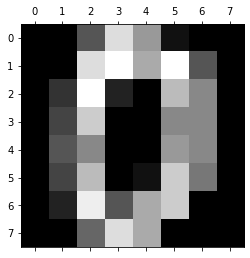

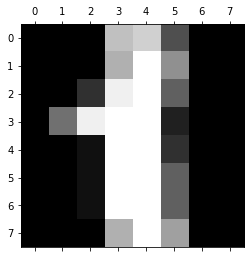

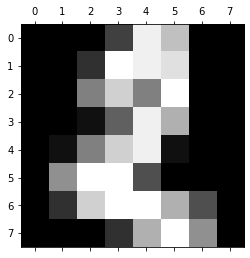

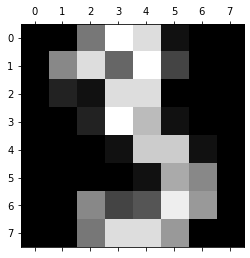

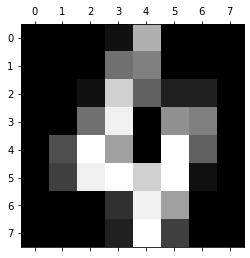

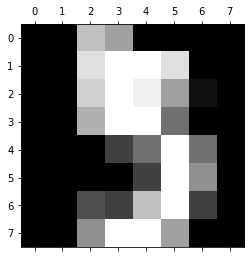

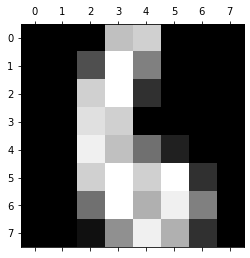

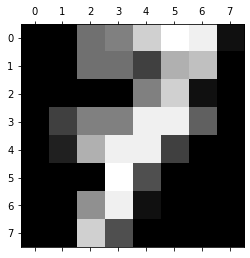

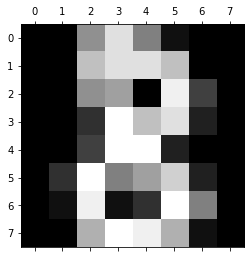

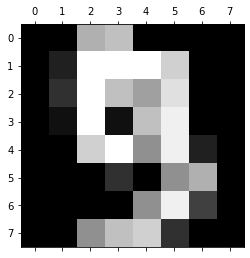

In [20]:
# Visualize image examples.
import matplotlib.pyplot as plt
plt.gray()
for i in range(10):
    plt.matshow(data.images[i])
plt.show()

In [21]:
# Split between train and test data.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs, labels, test_size=0.2, random_state=42)

# Encode labels as one-hot vectors.
one_hot = np.zeros((np.size(y_train, 0), num_labels))
for i in range(np.size(y_train, 0)):
    one_hot[i, y_train[i]] = 1
y_train = one_hot
one_hot = np.zeros((np.size(y_test, 0), num_labels))
for i in range(np.size(y_test, 0)):
    one_hot[i, y_test[i]] = 1
y_test = one_hot

Total loss: 2393.714981
Accuracy: 0.835769
Accuracy: 0.811111
Total loss: 1275.730838
Accuracy: 0.910230
Accuracy: 0.905556
Total loss: 821.922535
Accuracy: 0.939457
Accuracy: 0.922222
Total loss: 587.937941
Accuracy: 0.954071
Accuracy: 0.938889
Total loss: 454.266336
Accuracy: 0.961030
Accuracy: 0.944444
Total loss: 368.986277
Accuracy: 0.965205
Accuracy: 0.947222
Total loss: 307.897622
Accuracy: 0.971468
Accuracy: 0.950000
Total loss: 263.089224
Accuracy: 0.976340
Accuracy: 0.952778
Total loss: 229.737456
Accuracy: 0.981907
Accuracy: 0.958333
Total loss: 203.980013
Accuracy: 0.983299
Accuracy: 0.963889
Total loss: 183.411904
Accuracy: 0.987474
Accuracy: 0.963889
Total loss: 166.586414
Accuracy: 0.988170
Accuracy: 0.963889
Total loss: 152.532348
Accuracy: 0.990257
Accuracy: 0.963889
Total loss: 140.470226
Accuracy: 0.990953
Accuracy: 0.963889
Total loss: 130.102975
Accuracy: 0.990953
Accuracy: 0.966667
Total loss: 121.204548
Accuracy: 0.992345
Accuracy: 0.966667
Total loss: 113.452609

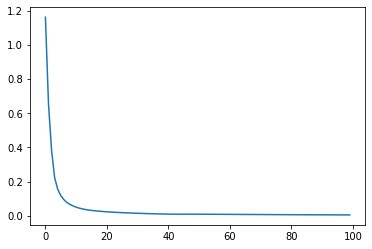

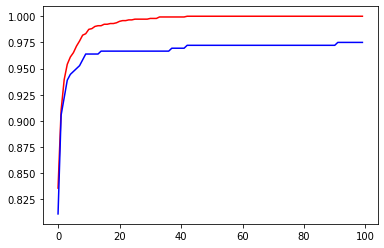

In [22]:
# Single hidden unit MLP with 50 hidden units.
# First is input size, last is output size.
units = [64, 50, 10]

# Initialize all weights and biases randomly.
W1 = .1 * np.random.randn(units[1], units[0])
b1 = .1 * np.random.randn(units[1])
W2 = .1 * np.random.randn(units[2], units[1])
b2 = .1 * np.random.randn(units[2])

weights = [W1, W2]
biases = [b1, b2]

# Learning rate.
eta = 0.001  
    
# Run 100 epochs of SGD to train the MLP.
training_acc = []
test_acc = []
losses = []
for epoch in range(100):
    loss = MLP_train_epoch(X_train, y_train, weights, biases, eta=eta, loss_function='cross_entropy')
    losses.append(loss)
    predicted_labels = MLP_predict(X_train, weights, biases)
    acc = evaluate(predicted_labels, y_train)
    training_acc.append(acc)
    predicted_labels = MLP_predict(X_test, weights, biases)
    acc = evaluate(predicted_labels, y_test)
    test_acc.append(acc)
    
plt.plot(range(100), losses)
plt.show()

plt.plot(range(100), training_acc, 'r-', test_acc, 'b-')
plt.show()


In [23]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(50),
                    activation='tanh',
                    solver='sgd',
                    learning_rate='constant',
                    learning_rate_init=0.001,
                    nesterovs_momentum=False,
                    random_state=1,
                    max_iter=1000)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9937369519832986
0.95


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
